In [1]:
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
year19_22 = pd.read_csv("../data/cleaned/19_22_finwlabel.csv")
year19_22


/var/folders/_2/33mp53_x0hggvd5wvtm7xmhr0000gn/T/ipykernel_63147/3495582107.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  year19_22 = pd.read_csv("../data/cleaned/19_22_finwlabel.csv")


,RCON1594,RCONB993,RIAD4518,RCON1255,RCON5400,RCON1254,RIAD4012,RIAD4507,RCON3545,RCONB834,...,Reporting Period End Date,OCC Charter Number,OTS Docket Number,Primary ABA Routing Number,Financial Institution Filing Type,CERT,date,date_index,last,survival
0,0.0,0,1.0,NaN,0,NaN,99,86,0.0,0.0,...,2004-03-31,0.0,15876.0,104908422.0,41.0,1434,2004-03-31,1,20.0,0.836963
1,0.0,0,0.0,NaN,0,NaN,14,38,0.0,0.0,...,2004-03-31,0.0,0.0,101209768.0,41.0,9377,2004-03-31,1,20.0,0.836963
2,0.0,0,6.0,NaN,0,NaN,31,0,0.0,0.0,...,2004-03-31,0.0,0.0,102104273.0,41.0,15759,2004-03-31,1,20.0,0.836963
3,0.0,571,18.0,NaN,0,NaN,238,53,0.0,0.0,...,2004-03-31,24484.0,14965.0,74913660.0,41.0,18927,2004-03-31,1,13.0,0.008934
4,0.0,0,0.0,NaN,0,NaN,9,8,0.0,0.0,...,2004-03-31,0.0,0.0,81505964.0,41.0,16959,2004-03-31,1,20.0,0.836963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157605,NaN,0,33.0,NaN,391,NaN,418,217,0.0,0.0,...,2008-12-31,23852.0,9702.0,267090060.0,41.0,33565,2008-12-31,20,20.0,0.836963
157606,0.0,0,230.0,0.0,299,0.0,4312,890,0.0,0.0,...,2008-12-31,12267.0,12252.0,51406543.0,41.0,6892,2008-12-31,20,20.0,0.836963
157607,NaN,0,34.0,NaN,0,NaN,2776,453,0.0,0.0,...,2008-12-31,3724.0,0.0,75901642.0,41.0,5307,2008-12-31,20,20.0,0.836963
157608,NaN,0,1.0,NaN,0,NaN,326,0,0.0,0.0,...,2008-12-31,0.0,0.0,36002810.0,41.0,33568,2008-12-31,20,20.0,0.836963


In [3]:
selected_features = ["CERT",'date_index','RCONB835', 'RIAD4180', 'RCON3505', 'RCON2150', 'RCON5400', 'RCON3499', 'RCON2930', 'RCON6558', 'RCONB528', 'RCONB576', 'RIAD4513', 'RCON3495', 'RCON2160', 'RCON5369', 'RIAD4301']
df_2022 = year19_22[(year19_22['date_index'] >= 17) & (year19_22['date_index'] <= 20)]
df_2022 = df_2022.loc[:, selected_features]
df_2022

,CERT,date_index,RCONB835,RIAD4180,RCON3505,RCON2150,RCON5400,RCON3499,RCON2930,RCON6558,RCONB528,RCONB576,RIAD4513,RCON3495,RCON2160,RCON5369,RIAD4301
127265,28139,17,0.0,0,0.0,769.0,100,0,4051.0,0.0,343265.0,0.0,0.0,0,16201.0,0.0,502
127266,1946,17,0.0,1,0.0,131.0,0,0,1174.0,0.0,75778.0,0.0,0.0,0,3542.0,0.0,-44
127267,6103,17,0.0,0,0.0,135.0,0,0,581.0,0.0,88392.0,0.0,0.0,40,1752.0,0.0,496
127268,1164,17,0.0,0,0.0,238.0,0,0,1992.0,0.0,212760.0,1.0,0.0,0,23796.0,229.0,3237
127269,58158,17,0.0,2,0.0,0.0,0,3853,1188.0,0.0,87209.0,0.0,0.0,0,1619.0,0.0,-103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157605,33565,20,0.0,0,0.0,270.0,391,0,985.0,0.0,137922.0,0.0,0.0,0,2910.0,0.0,745
157606,6892,20,0.0,871,0.0,3751.0,299,0,2255.0,0.0,637696.0,0.0,0.0,0,25237.0,0.0,9338
157607,5307,20,0.0,55,0.0,156.0,0,0,1027.0,0.0,177729.0,0.0,283.0,0,4167.0,116.0,511
157608,33568,20,0.0,0,0.0,0.0,0,500,481.0,0.0,48663.0,0.0,0.0,0,1008.0,0.0,-592


In [4]:
df_2022['date_index'] = df_2022['date_index'].replace({17: 1, 18: 6, 19:11, 20:16})

In [5]:
#flatten data 
def flatten_data(data, date_indices):
    flattened_data = []

    for _, group in data.groupby('CERT'):
        flattened_row = {'CERT': group['CERT'].iloc[0]}

        for index in date_indices:
            index_data = group[group['date_index'] == index]
            if not index_data.empty:
                for feature in selected_features:
                    flattened_row[f'{feature}_{index}'] = index_data[feature].values[0]

        flattened_data.append(flattened_row)

    return pd.DataFrame(flattened_data)

X = flatten_data(df_2022[selected_features ], [1,6,11,16])


In [6]:
df_2022_X = X.drop(['CERT_1',"CERT_6","CERT_11","CERT_16", "date_index_1", "date_index_6", "date_index_11", "date_index_16"], axis=1)

In [7]:
df_2022_X = df_2022_X.fillna(df_2022_X.median())
df_2022_X

,CERT,RCONB835_1,RIAD4180_1,RCON3505_1,RCON2150_1,RCON5400_1,RCON3499_1,RCON2930_1,RCON6558_1,RCONB528_1,...,RCON3499_16,RCON2930_16,RCON6558_16,RCONB528_16,RCONB576_16,RIAD4513_16,RCON3495_16,RCON2160_16,RCON5369_16,RIAD4301_16
0,14,0.0,57676.0,0.0,29.0,0.0,0.0,849.0,0.0,84659.5,...,0.0,779.0,0.0,91386.0,0.0,17290.0,0.0,2936.0,0.0,2852449.0
1,35,0.0,355.0,0.0,420.0,0.0,0.0,3949.0,0.0,331083.0,...,0.0,4940.0,0.0,369162.0,0.0,351.0,0.0,31577.0,3819.0,9275.0
2,39,0.0,0.0,0.0,10.0,0.0,0.0,995.0,0.0,156503.0,...,0.0,1059.0,0.0,179160.0,0.0,0.0,4.0,5216.0,0.0,4025.0
3,41,0.0,4.0,0.0,604.0,0.0,0.0,2517.0,0.0,92255.0,...,0.0,2473.0,0.0,90076.0,0.0,0.0,0.0,8564.0,0.0,4213.0
4,46,0.0,0.0,0.0,0.0,40.0,0.0,1077.0,0.0,195757.0,...,0.0,829.0,0.0,191431.0,0.0,53.0,0.0,8806.0,112.0,1486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,90582,0.0,16.0,0.0,1100.0,0.0,0.0,1111.0,0.0,96791.0,...,0.0,1395.0,0.0,101252.0,0.0,23.0,1431.0,4044.0,0.0,-662.0
7719,91005,0.0,0.0,0.0,0.0,0.0,0.0,2711.0,0.0,77966.0,...,0.0,1995.0,0.0,107539.0,749.0,0.0,0.0,6656.0,0.0,1188.0
7720,91280,0.0,0.0,0.0,3950.0,0.0,0.0,1100.0,0.0,97031.0,...,0.0,929.0,0.0,97834.0,0.0,0.0,0.0,2413.0,8121.0,1223.0
7721,91322,0.0,0.0,0.0,0.0,0.0,0.0,6566.0,0.0,0.0,...,0.0,779.0,0.0,91386.0,0.0,0.0,0.0,2936.0,0.0,762.0


In [8]:
#normalize data 
def normalize_dataframe(df):
    scaler = StandardScaler()
    columns_to_normalize = [col for col in df.columns if col != 'CERT']
    df_normalized = df.copy()
    df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df_normalized

X_normalized = normalize_dataframe(df_2022_X)
X_normalized

,CERT,RCONB835_1,RIAD4180_1,RCON3505_1,RCON2150_1,RCON5400_1,RCON3499_1,RCON2930_1,RCON6558_1,RCONB528_1,...,RCON3499_16,RCON2930_16,RCON6558_16,RCONB528_16,RCONB576_16,RIAD4513_16,RCON3495_16,RCON2160_16,RCON5369_16,RIAD4301_16
0,14,0.0,2.187137,-0.021132,-0.242861,-0.030406,-0.079667,-0.058531,-0.040826,-0.152497,...,-0.052952,-0.035742,-0.041376,-0.157356,-0.022109,6.334554,-0.110641,-0.050982,-0.030362,9.249117
1,35,0.0,-0.022562,-0.021132,-0.116742,-0.030406,-0.079667,-0.019355,-0.040826,0.049545,...,-0.052952,-0.010932,-0.041376,0.075811,-0.022109,0.089251,-0.110641,0.052595,-0.006230,0.023365
2,39,0.0,-0.036248,-0.021132,-0.248989,-0.030406,-0.079667,-0.056686,-0.040826,-0.093593,...,-0.052952,-0.034072,-0.041376,-0.083678,-0.022109,-0.040160,-0.105233,-0.042736,-0.030362,0.006329
3,41,0.0,-0.036093,-0.021132,-0.057392,-0.030406,-0.079667,-0.037452,-0.040826,-0.146270,...,-0.052952,-0.025642,-0.041376,-0.158456,-0.022109,-0.040160,-0.110641,-0.030629,-0.030362,0.006939
4,46,0.0,-0.036248,-0.021132,-0.252215,-0.028112,-0.079667,-0.055649,-0.040826,-0.061409,...,-0.052952,-0.035444,-0.041376,-0.073378,-0.022109,-0.020619,-0.110641,-0.029754,-0.029654,-0.001910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,90582,0.0,-0.035631,-0.021132,0.102595,-0.030406,-0.079667,-0.055220,-0.040826,-0.142551,...,-0.052952,-0.032069,-0.041376,-0.149075,-0.022109,-0.031680,1.824023,-0.046975,-0.030362,-0.008880
7719,91005,0.0,-0.036248,-0.021132,-0.252215,-0.030406,-0.079667,-0.035000,-0.040826,-0.157985,...,-0.052952,-0.028492,-0.041376,-0.143797,0.060479,-0.040160,-0.110641,-0.037529,-0.030362,-0.002877
7720,91280,0.0,-0.036248,-0.021132,1.021874,-0.030406,-0.079667,-0.055359,-0.040826,-0.142354,...,-0.052952,-0.034847,-0.041376,-0.151944,-0.022109,-0.040160,-0.110641,-0.052873,0.020953,-0.002763
7721,91322,0.0,-0.036248,-0.021132,-0.252215,-0.030406,-0.079667,0.013716,-0.040826,-0.221909,...,-0.052952,-0.035742,-0.041376,-0.157356,-0.022109,-0.040160,-0.110641,-0.050982,-0.030362,-0.004259


# Combined Model

In [9]:
loaded_model = pickle.load(open("./finalized_model_ML_norm2.sav", 'rb'))
pred = loaded_model.predict(X_normalized.iloc[:, 1:])
pred


array([16.,  5.,  5., ...,  5.,  5.,  5.])

([<matplotlib.axis.XTick at 0x1649a15a0>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

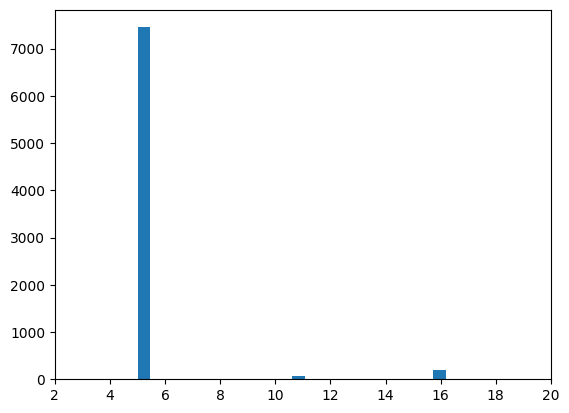

In [10]:
conbined_pred = pd.DataFrame()
conbined_pred["pred_last"] = pred
plt.hist(conbined_pred["pred_last"], bins=30)
plt.xticks(range(2, 21, 2))

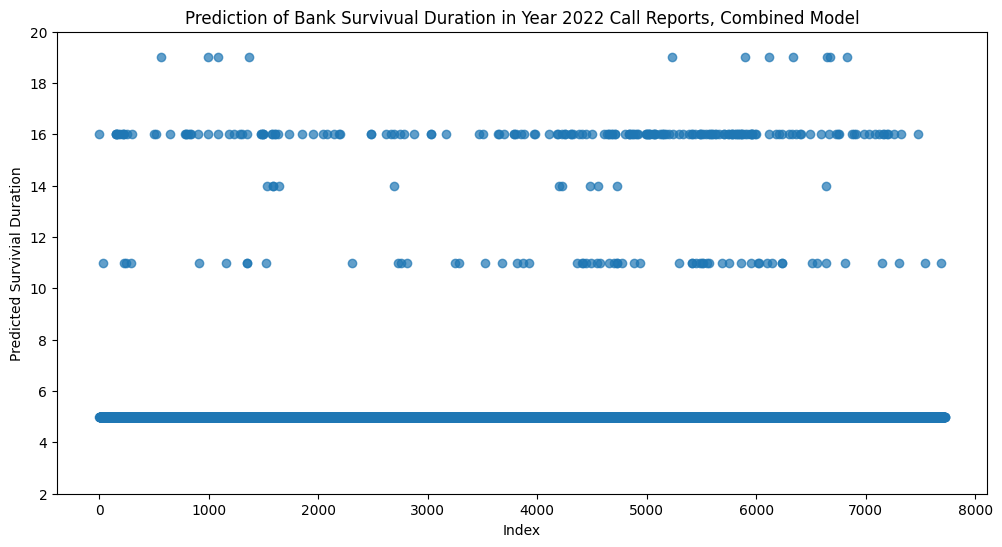

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(conbined_pred)),conbined_pred["pred_last"] , label='Actual', alpha=0.7)
# plt.scatter(np.arange(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Predicted Survivial Duration')
plt.title('Prediction of Bank Survivual Duration in Year 2022 Call Reports, Combined Model')
plt.yticks(range(2, 21, 2))
plt.savefig("../image/combined_model_2022_pred.png", format='png')
plt.show()

In [15]:
conbined_pred.loc[conbined_pred["pred_last"] > 8, "pred_last"] = 8 
conbined_pred

,pred_last
0,8.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
7718,5.0
7719,5.0
7720,5.0
7721,5.0


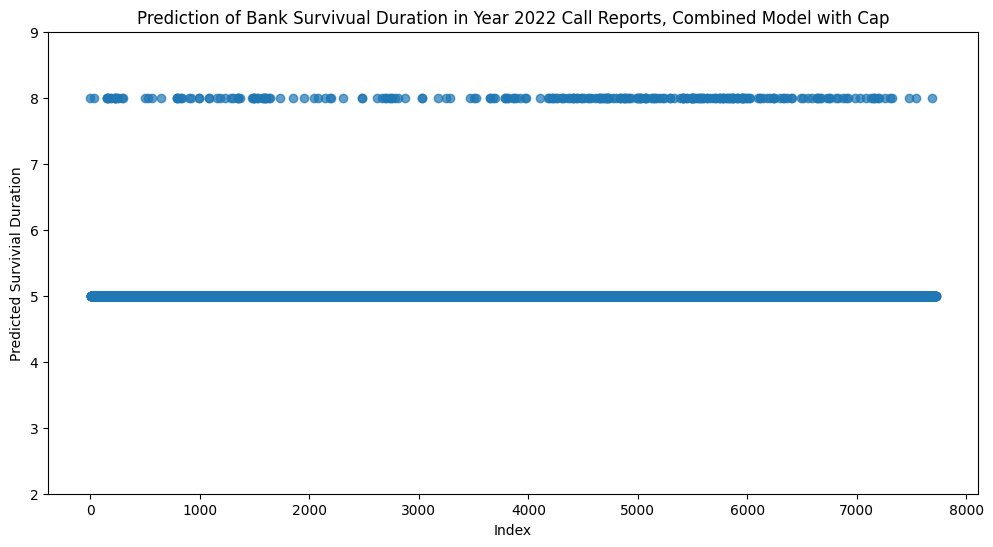

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(conbined_pred)),conbined_pred["pred_last"] , label='Actual', alpha=0.7)
# plt.scatter(np.arange(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Predicted Survivial Duration')
plt.title('Prediction of Bank Survivual Duration in Year 2022 Call Reports, Combined Model with Cap')
plt.yticks(range(2, 10, 1))
plt.savefig("../image/combined_model_2022_pred_withcap.png", format='png')
plt.show()

# NN 

In [12]:
import torch
import torch.nn as nn

class NeuralNetworkMultiClassification(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetworkMultiClassification, self).__init__()
        self.lrelu = nn.LeakyReLU(0.1)
        self.drop = nn.Dropout(0.5)
        self.layer1 = nn.Linear(input_size, 256)
        self.layer2 = nn.Linear(256, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.layer5 = nn.Linear(128, 64)
        self.layer6 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(self.lrelu(self.layer2(x)) + x)
        x = self.drop(x)
        x = self.layer3(x)
        x = self.bn2(self.lrelu(self.layer4(x)) + x)
        x = self.drop(x)
        x = self.lrelu(self.layer5(x))
        x = self.layer6(x)
        return nn.functional.softmax(x, dim=1)

model = NeuralNetworkMultiClassification(60,20)
model.load_state_dict(torch.load('my_classification_model2.pth'))
model.eval()
data = df_2022_X.iloc[:, 1:].values
data

array([[0.000000e+00, 5.767600e+04, 0.000000e+00, ..., 2.936000e+03,
        0.000000e+00, 2.852449e+06],
       [0.000000e+00, 3.550000e+02, 0.000000e+00, ..., 3.157700e+04,
        3.819000e+03, 9.275000e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.216000e+03,
        0.000000e+00, 4.025000e+03],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.413000e+03,
        8.121000e+03, 1.223000e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.936000e+03,
        0.000000e+00, 7.620000e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.485900e+04,
        0.000000e+00, 9.523000e+03]])

In [13]:
X_train = torch.tensor(data, dtype=torch.float32)
output = model(X_train)

([<matplotlib.axis.XTick at 0x2a7f04e80>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

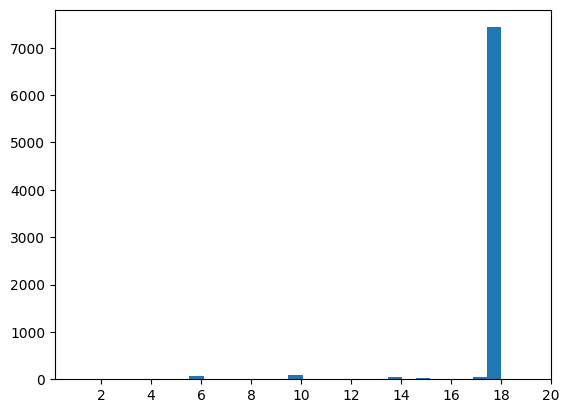

In [14]:
output.detach().numpy()
pred = np.argmax(output.detach(), axis=1).numpy()
nn_pred =pd.DataFrame()
nn_pred["pred_last"] = pred
plt.hist(nn_pred["pred_last"], bins=30)
plt.xticks(range(2, 21, 2))


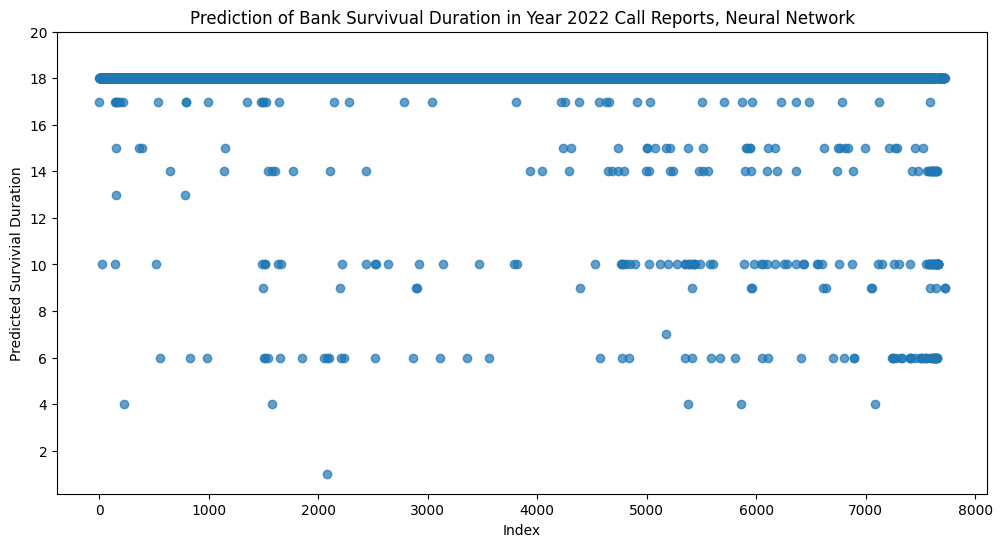

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(nn_pred)),nn_pred["pred_last"] , label='Actual', alpha=0.7)
# plt.scatter(np.arange(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Predicted Survivial Duration')
plt.title('Prediction of Bank Survivual Duration in Year 2022 Call Reports, Neural Network')
plt.yticks(range(2, 21, 2))
plt.savefig("../image/nn_model_2022_pred.png", format='png')
plt.show()